Zack Martin
EE 399 HW 2
https://github.com/zimartin/EE-399-HW-2

In [45]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 
from scipy.sparse.linalg import eigs

Part A

In [46]:
# load data into X
results=loadmat('yalefaces.mat')
X=results['X']
print(X.shape)

(1024, 2414)


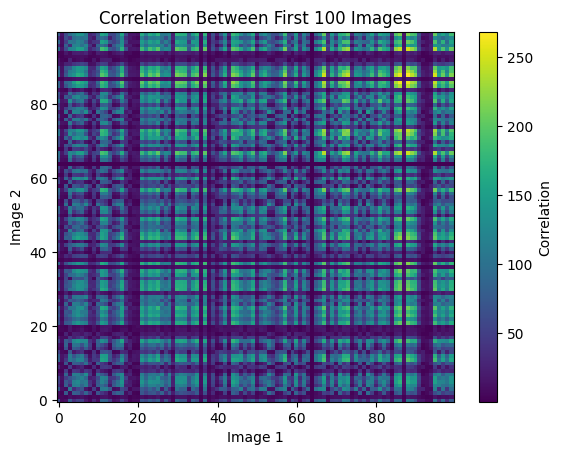

In [47]:
# first 100 images into matrix X
data_100 = X[:, :100]
C = np.ndarray((100, 100))

# correlation matrix C, dot product (correlation) between first 100 images in X
C = np.dot(data_100.T, data_100)

# plot the correlation matrix using pcolor
fig, ax = plt.subplots()
ab = ax.pcolor(range(0, 100), range(0, 100), C, vmin = np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between First 100 Images")
ax.set_xlabel("Image 1")
ax.set_ylabel("Image 2")
fig.colorbar(ab, ax=ax, label="Correlation")

Part B

First Pair:
Most: [88 88] Least: [64 64]
Final Findings:
Most: [86 88] Least: [54 64]


Text(0.5, 0.85, 'Least Correlated Images')

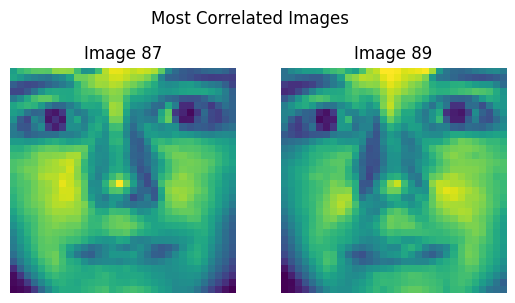

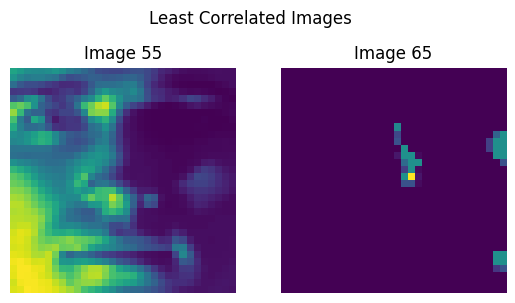

In [48]:
# most correlated
most = np.argwhere(C == np.max(C))[0]

# least correlated
least = np.argwhere(C == np.min(C))[0]

print("First Pair:\nMost:", most,"Least:", least)

# images are the same, look for next most/ least correlated
most = np.argwhere(C == np.sort(C.flatten())[-3])[0]
least = np.argwhere(C == np.sort(C.flatten())[1])[0]
print("Final Findings:\nMost:", most,"Least:", least)

# plot most correlated
fig1 = plt.figure()
for i in range(2):
    corr = X[:, most[i]].reshape((32, 32), order='F').T
    ax = fig1.add_subplot(1, 2, i+1)
    ax.imshow(corr)
    ax.set_title("Image " + str(most[i]+1))
    plt.axis('off')
fig1.suptitle("Most Correlated Images", y=.85)

# plot least correlated
fig2 = plt.figure()
for i in range(2):
    corr = X[:, least[i]].reshape((32, 32), order='F').T
    ax = fig2.add_subplot(1, 2, i+1)
    ax.imshow(corr)
    ax.set_title("Image " + str(least[i]+1))
    plt.axis('off')
fig2.suptitle("Least Correlated Images", y=.85)

Part C

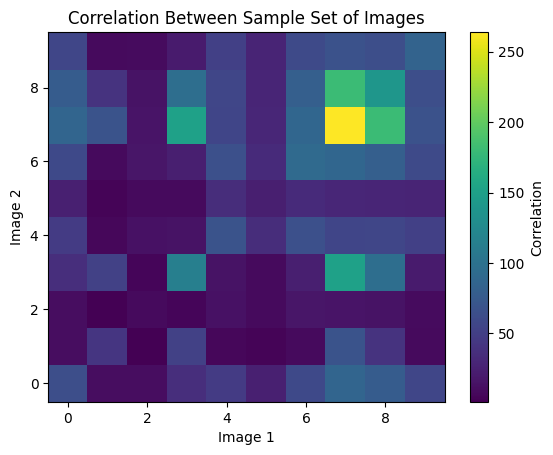

In [49]:
# sample set
img_list = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]

# sample images from data set
get_img = X[:, np.subtract(img_list, 1)]

# morrelation matrix
C = np.ndarray((10, 10))
C = np.dot(get_img.T, get_img)

# plot the correlation matrix
fig, ax = plt.subplots()
corr = ax.pcolor(range(0, 10), range(0, 10), C, vmin=np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between Sample Set of Images")
ax.set_xlabel("Image 1")
ax.set_ylabel("Image 2")
fig.colorbar(corr, ax=ax, label="Correlation")

Part D

In [50]:
# create matrix Y
Y = np.dot(X, X.T)

# find first 6 eigenvectors with the largest magnitude eigenvalue
# eigenvalues - w
# eigenvectors - v
w, v = scipy.sparse.linalg.eigs(Y, k=6, which="LM")

for i in range(0, 6):
    print("Eigenvalue:", np.real(w[i]))
    print("Eigenvector:", np.real(v[:, i]))

Eigenvalue: 234020.4548538858
Eigenvector: [0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ]
Eigenvalue: 49038.31530059216
Eigenvector: [ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746]
Eigenvalue: 8236.539897013148
Eigenvector: [-0.05653196 -0.04709124 -0.0362807  ... -0.06455006 -0.06196898
 -0.05241684]
Eigenvalue: 6024.871457930157
Eigenvector: [-0.04441826 -0.05057969 -0.05522219 ...  0.01006919  0.00355905
 -0.00040934]
Eigenvalue: 2051.496432691054
Eigenvector: [-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412]
Eigenvalue: 1901.079114823662
Eigenvector: [0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028]


Part E

In [51]:
# perform SVD on X
U, s, Vt = np.linalg.svd(X)

# find the first six principal component directions
pc_directions = U[:, :6]

# print the principal component directions
print(pc_directions)

[[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937  0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902   0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019   0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


Part F

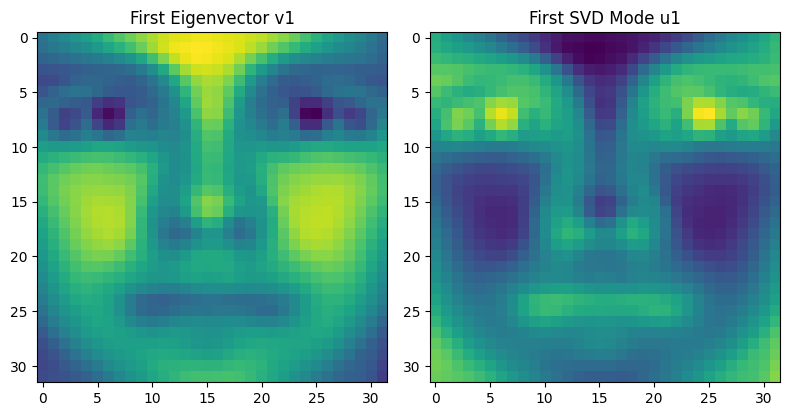

v1:
 [0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ]
u1:
 [-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]
Norm of difference of their absolute values: 6.742051385122386e-16


In [55]:
v1 = np.real(v[:,0])
u1 = pc_directions[:,0]

# plot the first eigenvector and SVD Mode
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
img = v1.reshape(32,32)
plt.title('First Eigenvector v1')
plt.imshow(img)
plt.subplot(1,2,2)
img = u1.reshape(32,32)
plt.title('First SVD Mode u1')
plt.imshow(img)
plt.tight_layout()
plt.show()

# print values and norm of difference
print("v1:\n", v1)
print("u1:\n", u1)

norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("Norm of difference of their absolute values:", norm)

Part G

Percentage of variance captured by each of the first 6 SVD modes:
SVD Mode 1: 77.677% Var
SVD Mode 2: 16.277% Var
SVD Mode 3: 2.734% Var
SVD Mode 4: 2.0% Var
SVD Mode 5: 0.681% Var
SVD Mode 6: 0.631% Var


Text(0.5, 0.98, 'First 6 SVD Modes')

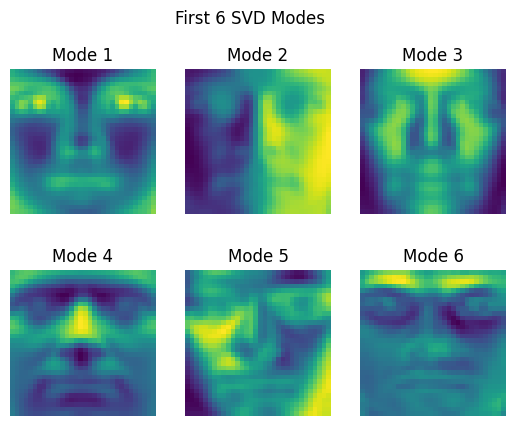

In [54]:
var = s[:6] ** 2
var_ratio = var/np.sum(var) * 100
print("Percentage of variance captured by each of the first 6 SVD modes:")

for i in range(6):
    print("SVD Mode ", i+1, ": ", round(var_ratio[i], 3), "% ", "Var", sep="")

# plot the first 6 SVD modes
fig = plt.figure()
for i in range(6):
    mode = pc_directions[:, i].reshape((32, 32), order='F').T
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(mode)
    plt.title("Mode " + str(i+1))
    plt.axis('off')
fig.suptitle("First 6 SVD Modes")